In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

In [3]:
import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)

In [4]:
n = 100
h = 61
alpha = 2
beta = 2

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=n, p=p, observed=h)

    # inference
    start = pm.find_MAP() # Use MAP estimate (optimization) as the initial state for MCMC
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)

Applied logodds-transform to p and added transformed p_logodds to model.
 [-----------------100%-----------------] 1000 of 1000 complete in 1.0 sec

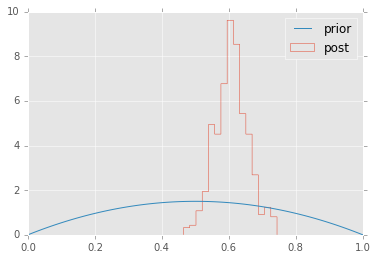

In [5]:
plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

Estimating parameters for linear regression
==

Applied interval-transform to sigma and added transformed sigma_interval to model.
 [-----------------100%-----------------] 10000 of 10000 complete in 6.6 sec

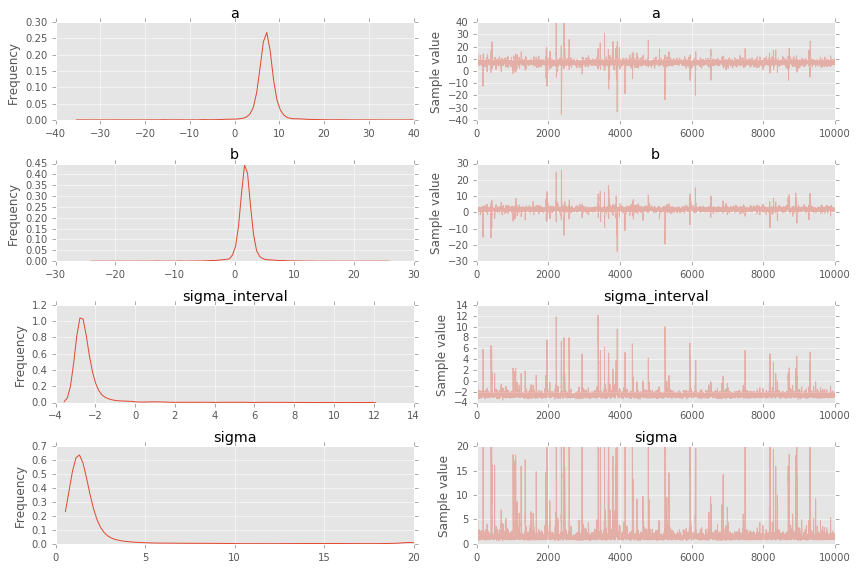

In [17]:
# observed data
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)
niter = 10000

with pm.Model() as model:
    a = pm.Normal('a', mu=0, sd=20)
    b = pm.Normal('b', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = a*x + b # simple auxiliary variables

    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    # inference
    start = pm.find_MAP()
    step = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace);

In [18]:
pm.summary(trace)


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.047            2.785            0.058            [2.749, 11.471]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.775          6.081          7.067          8.023          11.504


b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.847            1.776            0.046            [-0.718, 4.933]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.915         1.267          1.836          2.411          4.842


sigma_interval:

  Mean             SD               MC Error         95% HPD interval
  ---------------------